Importação das bibliotecas necessárias

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def predict_image(image_path):
    # Carregar o modelo salvo
    model = tf.keras.models.load_model('models/dog_fox_classifier.keras')

    # Carregar e preprocessar a imagem
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0  # Normalização

    # Fazer a predição
    prediction = model.predict(img_array)

    # Interpretar o resultado
    # Como usamos classificação binária, valores próximos a 0 indicam a primeira classe (dog)
    # e valores próximos a 1 indicam a segunda classe (fox)
    class_names = ['dog', 'fox']
    # Corrigido: extrair o valor escalar do array
    pred_value = prediction[0].item()  # Converte para escalar
    predicted_class = class_names[int(pred_value > 0.5)]
    confidence = pred_value if pred_value > 0.5 else 1 - pred_value

    return predicted_class, float(confidence)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


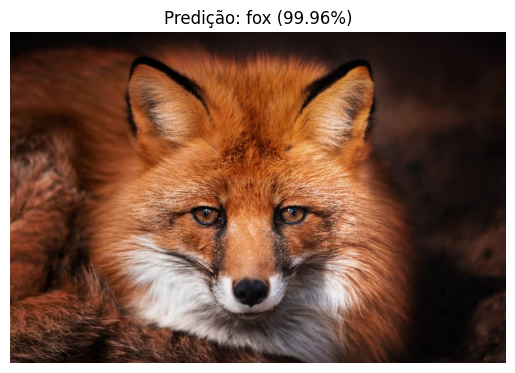

Classe predita: fox
Confiança: 99.96%


In [3]:
# Fazer uma predição
image_path = 'predict/raposa.jpg'
predicted_class, confidence = predict_image(image_path)

img = image.load_img(image_path)
plt.imshow(img)
plt.axis('off')
plt.title(f'Predição: {predicted_class} ({confidence:.2%})')
plt.show()

print(f'Classe predita: {predicted_class}')
print(f'Confiança: {confidence:.2%}')